# Loading crude oil data and calculation EMAs

In [64]:
install.packages("lubridate")
library(lubridate)
library(quantmod)
library(tidyverse)


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpkYsINl/downloaded_packages


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::first()           masks xts::first()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ dplyr::last()            masks xts::last()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



In [115]:
# Load the data
price <- read.csv("data/wtiDaily.csv")
head(price)

,X7.13.2016,X53.48,X53.61,X51.46,X51.65
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,7/14/2016,52.04,52.70,51.85,52.58
2,7/15/2016,52.42,53.23,51.95,52.85
3,7/18/2016,53.03,53.04,51.74,52.14
4,7/19/2016,52.13,52.58,51.48,51.65
5,7/20/2016,51.62,52.33,50.75,51.95
6,7/21/2016,51.85,52.29,50.72,50.95


In [116]:
setup_data <- function(pricedata) {
    names(pricedata) <- c("Date", "Open", "High", "Low", "Close")
    dates <- parse_date_time(x = pricedata[,1], "mdy_HM", truncated = 3)
    pricedata <- pricedata[,2:5]
    pricedata <- xts(pricedata, order.by = dates)
}

In [117]:
price <- setup_data(price)

In [118]:
head(price)

Warning message:
“timezone of object (UTC) is different than current timezone ().”


            Open  High   Low Close
2016-07-14 52.04 52.70 51.85 52.58
2016-07-15 52.42 53.23 51.95 52.85
2016-07-18 53.03 53.04 51.74 52.14
2016-07-19 52.13 52.58 51.48 51.65
2016-07-20 51.62 52.33 50.75 51.95
2016-07-21 51.85 52.29 50.72 50.95

In [119]:
summary(price)

     Index                          Open            High            Low       
 Min.   :2016-07-14 00:00:00   Min.   :42.66   Min.   :43.31   Min.   :42.16  
 1st Qu.:2017-01-20 00:00:00   1st Qu.:49.77   1st Qu.:50.40   1st Qu.:49.06  
 Median :2017-07-31 00:00:00   Median :54.55   Median :55.42   Median :54.01  
 Mean   :2017-07-30 05:24:28   Mean   :55.66   Mean   :56.34   Mean   :54.95  
 3rd Qu.:2018-02-07 00:00:00   3rd Qu.:61.15   3rd Qu.:61.84   3rd Qu.:60.44  
 Max.   :2018-08-15 00:00:00   Max.   :73.45   Max.   :74.37   Max.   :72.75  
     Close      
 Min.   :42.64  
 1st Qu.:49.77  
 Median :54.73  
 Mean   :55.68  
 3rd Qu.:61.12  
 Max.   :73.43  

In [120]:
ema7 <- EMA(price$Close, n= 7)  # Exponential Moving Average
ema20 <- EMA(price$Close, n=20) # Exponential Moving Average

In [121]:
tail(ema7)

Warning message:
“timezone of object (UTC) is different than current timezone ().”


                EMA
2018-08-08 68.39387
2018-08-09 67.99790
2018-08-10 67.90593
2018-08-13 67.72944
2018-08-14 67.55708
2018-08-15 66.86031

In [122]:
tail(ema20)

Warning message:
“timezone of object (UTC) is different than current timezone ().”


                EMA
2018-08-08 68.79087
2018-08-09 68.60222
2018-08-10 68.50963
2018-08-13 68.38490
2018-08-14 68.25681
2018-08-15 67.92474

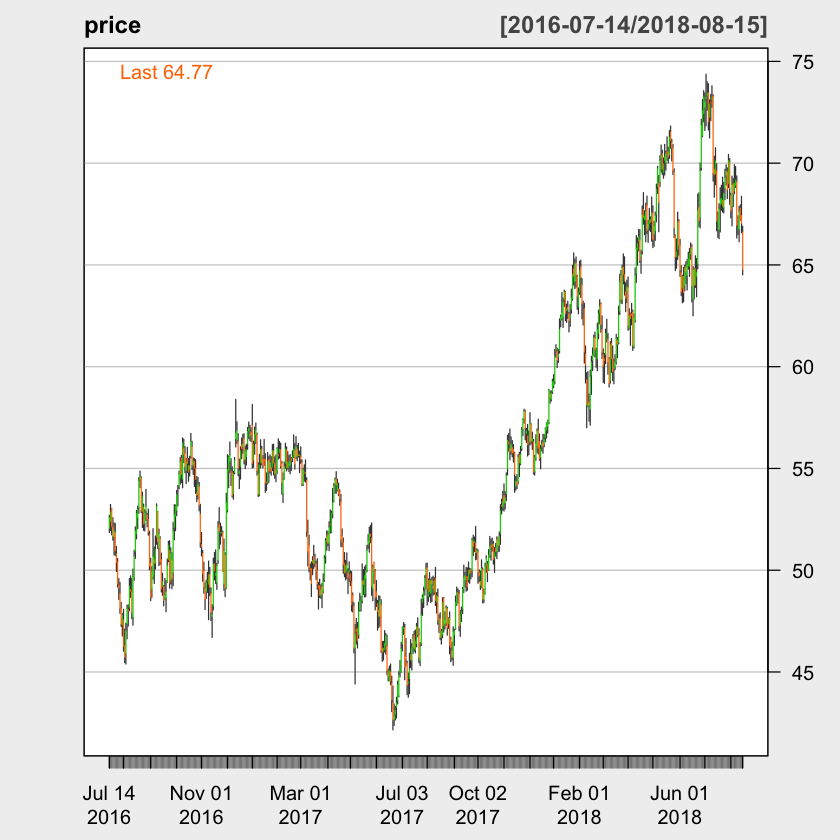

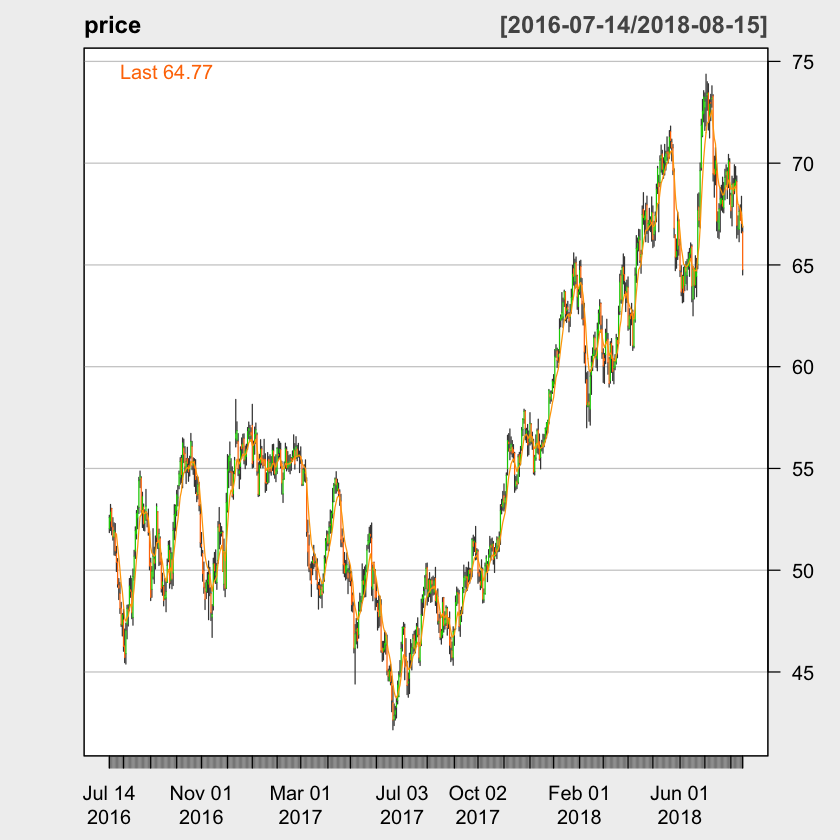

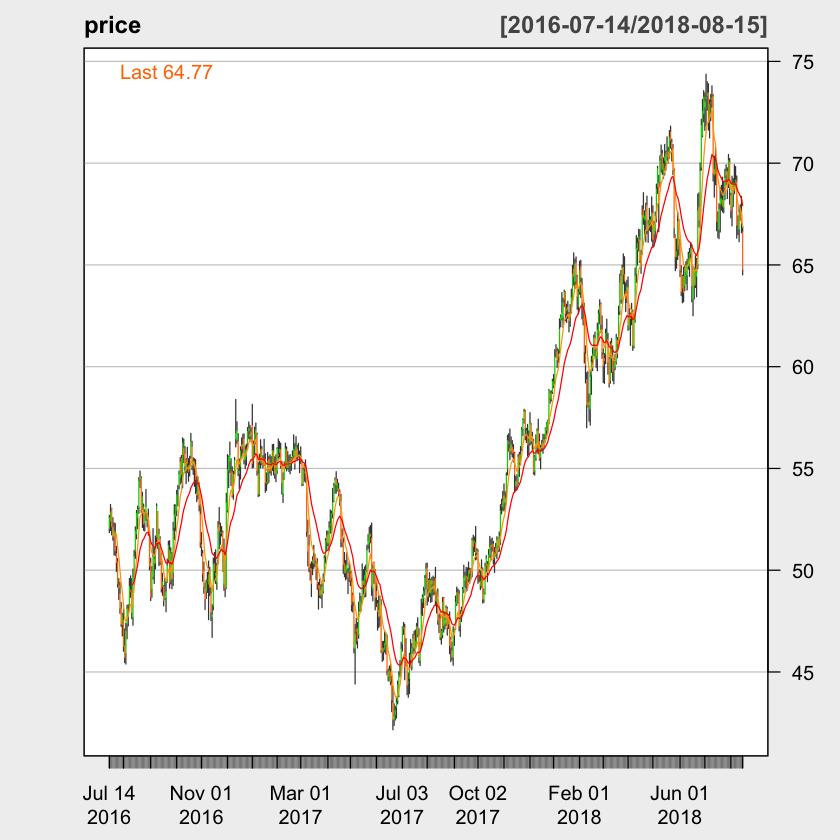

In [123]:
# Plotting the data
chartSeries(price, theme = "white")
addEMA( n=7, col="orange")
addEMA( n=20, col="red")

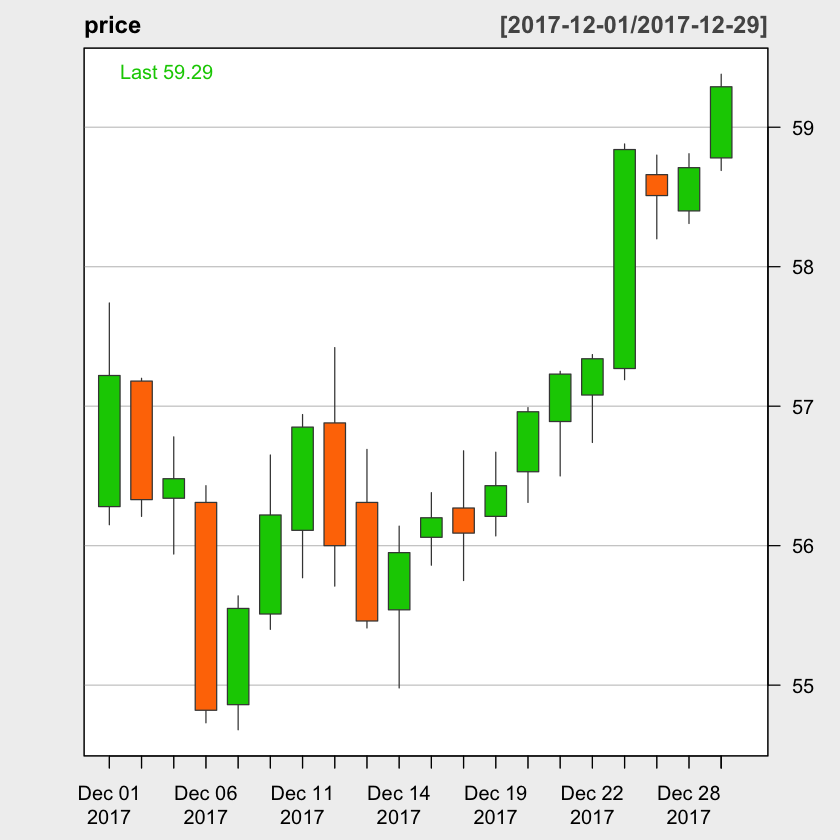

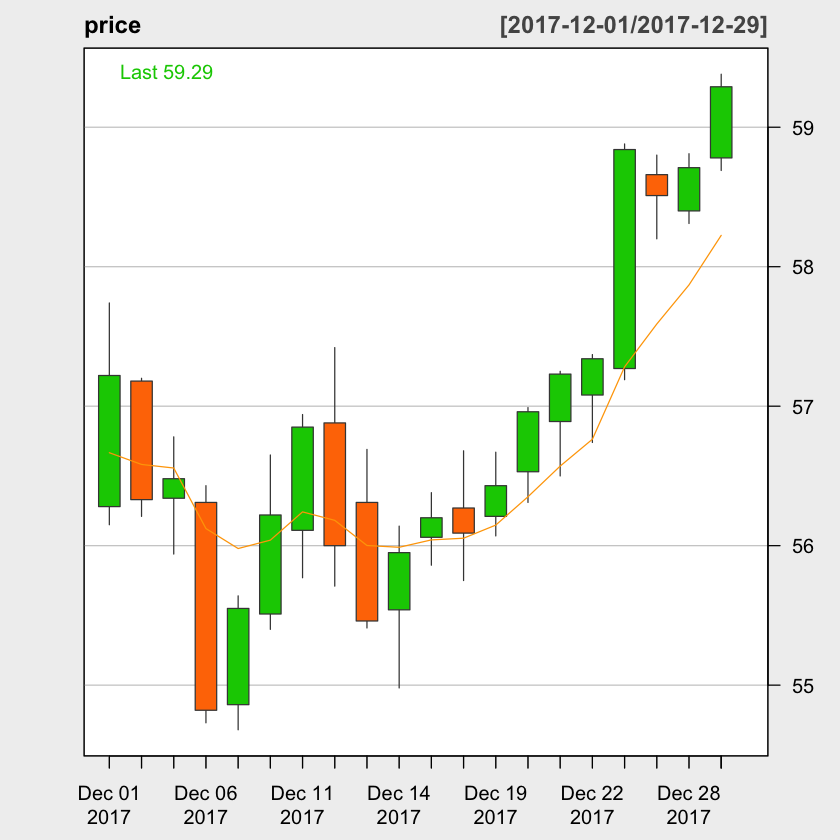

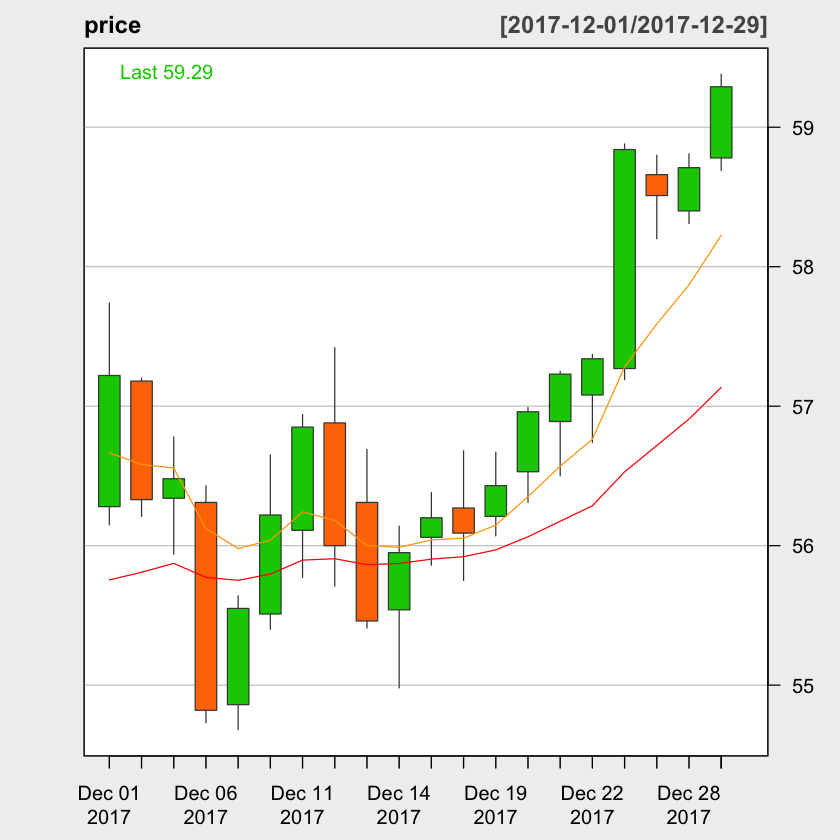

In [124]:
# Plotting the data
chartSeries(price, subset="2017-12", theme = "white")
addEMA( n=7, col="orange")
addEMA( n=20, col="red")

In [125]:
# Feature engineering
candle.type.current <- data.frame(ifelse(price$Close > price$Open, "bull", "bear"))
head(candle.type.current)

,Close
,<chr>
2016-07-14,bull
2016-07-15,bull
2016-07-18,bear
2016-07-19,bear
2016-07-20,bull
2016-07-21,bear


In [127]:
candle.type.previous <- data.frame(lag(candle.type.current$Close, n=1))  #  shifting the time base back by a given number of observations. 
head(candle.type.previous)

,lag.candle.type.current.Close..n...1.
,<chr>
1,NA
2,bull
3,bull
4,bear
5,bear
6,bull


In [128]:
candle.next.day <- data.frame(lead(candle.type.current$Close, n=1)) #  shifting the time base forward by a given number of observations. 
head(candle.next.day)

,lead.candle.type.current.Close..n...1.
,<chr>
1,bull
2,bear
3,bear
4,bull
5,bear
6,bear


In [129]:
doji <- data.frame(ifelse(abs(price$Close - price$Open) < 0.45, "yes", "no"))
head(doji)

,Close
,<chr>
2016-07-14,no
2016-07-15,yes
2016-07-18,no
2016-07-19,no
2016-07-20,yes
2016-07-21,no


In [130]:
position.to.ema7 <- data.frame(ifelse(price$Close > ema7, "above", "below"))
tail(position.to.ema7)

,Close
,<chr>
2018-08-08,below
2018-08-09,below
2018-08-10,below
2018-08-13,below
2018-08-14,below
2018-08-15,below


In [131]:
position.to.ema20 <- data.frame(ifelse(price$Close > ema20, "above", "below"))
tail(position.to.ema20)

,Close
,<chr>
2018-08-08,below
2018-08-09,below
2018-08-10,below
2018-08-13,below
2018-08-14,below
2018-08-15,below


In [132]:
ema7.to.ema20 <- data.frame(ifelse(ema7 > ema20, "above", "below"))

In [133]:
daily.return <- data.frame(abs(price$Close - price$Open))
nextday.return <- lead(daily.return, n=1)
head(nextday.return)

,Close
,<dbl>
2016-07-15,0.43
2016-07-18,0.89
2016-07-19,0.48
2016-07-20,0.33
2016-07-21,0.90
2016-07-22,0.41


In [134]:
# Making up the dataframe with all the features as columns
clData <- data.frame(candle.type.current, candle.type.previous,
                    doji, position.to.ema7, position.to.ema20, ema7.to.ema20,
                    daily.return, nextday.return, candle.next.day)
tail(clData)

,Close,lag.candle.type.current.Close..n...1.,Close.1,Close.2,Close.3,EMA,Close.4,Close.5,lead.candle.type.current.Close..n...1.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2018-08-08,bear,bull,no,below,below,below,2.15,0.02,bull
2018-08-09,bull,bear,yes,below,below,below,0.02,0.89,bull
2018-08-10,bull,bull,no,below,below,below,0.89,0.58,bear
2018-08-13,bear,bull,no,below,below,below,0.58,0.38,bear
2018-08-14,bear,bear,yes,below,below,below,0.38,1.85,bear
2018-08-15,bear,bear,no,below,below,below,1.85,NA,NA


In [135]:
# naming the dataframe columns
names(clData) <- c("candle.type.current", "candle.type.previous",
                  "doji", "position.to.ema7", "position.to.ema20",
                  "ema7.to.ema20", "daily.return", "nextday.return",
                  "candle.next.day")

head(clData)

,candle.type.current,candle.type.previous,doji,position.to.ema7,position.to.ema20,ema7.to.ema20,daily.return,nextday.return,candle.next.day
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2016-07-14,bull,NA,no,NA,NA,NA,0.54,0.43,bull
2016-07-15,bull,bull,yes,NA,NA,NA,0.43,0.89,bear
2016-07-18,bear,bull,no,NA,NA,NA,0.89,0.48,bear
2016-07-19,bear,bear,no,NA,NA,NA,0.48,0.33,bull
2016-07-20,bull,bear,yes,NA,NA,NA,0.33,0.90,bear
2016-07-21,bear,bull,no,NA,NA,NA,0.90,0.41,bear


In [143]:
# Feature engineering - Training and testing
clData <- slice(clData, 21:length(clData$doji))
head(clData)

,candle.type.current,candle.type.previous,doji,position.to.ema7,position.to.ema20,ema7.to.ema20,daily.return,nextday.return,candle.next.day
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2016-08-11,bull,bear,no,above,above,below,2.01,1.03,bull
2016-08-12,bull,bull,no,above,above,below,1.03,1.00,bull
2016-08-15,bull,bull,no,above,above,above,1.00,0.99,bull
2016-08-16,bull,bull,no,above,above,above,0.99,0.42,bull
2016-08-17,bull,bull,yes,above,above,above,0.42,1.31,bull
2016-08-18,bull,bull,no,above,above,above,1.31,0.16,bull


# Data Preparation for the ML

In [144]:
trainRange <- 1:300
testRange <- 300:516

train <- clData[trainRange,]
test <- clData[testRange,]

In [145]:
# Define a formula: target variables and predictors

target <- "candle.next.day"
predictors.var <- c("candle.type.current", "candle.type.previous",
                  "doji", "position.to.ema7", "position.to.ema20",
                  "ema7.to.ema20", "daily.return")

In [146]:
# Formula
# Target ~ Predictor1 + Predictor2 + Predictor3 ...

predictors.var <- paste(predictors.var, collapse = "+")
predictors.var

[1] "candle.type.current+candle.type.previous+doji+position.to.ema7+position.to.ema20+ema7.to.ema20+daily.return"

In [147]:
formula <- as.formula(paste(target,"~", predictors.var, sep=""))
formula

candle.next.day ~ candle.type.current + candle.type.previous + 
    doji + position.to.ema7 + position.to.ema20 + ema7.to.ema20 + 
    daily.return

In [148]:
# function for processing predictions
predictedReturn <- function(df, pred) {
    # pred is our prediction from the machine learning model
    df$pred <- pred
    df$prediReturn <- ifelse(df$candle.next.day != df$pred, -df$nextday.return, df$nextday.return)
    df$cumReturn <- cumsum(prediReturn)
    return(df)
}